In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1 = pd.read_csv("data_clean.csv")
print(data1)

In [ ]:
data1.info()

In [ ]:
data1['Month']=pd.to_numeric(data1['Month'],errors='coerce')
data1.info()

In [ ]:
data1[data1.duplicated(keep = False)]

In [12]:
data1.rename({'Soalr.R': 'Solar'}, axis=1, inplace = True)
data1

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,75,9.0,28,2010,75,S


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       157 non-null    float64
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 12.5+ KB


In [14]:
data1.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          1
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

<Axes: >

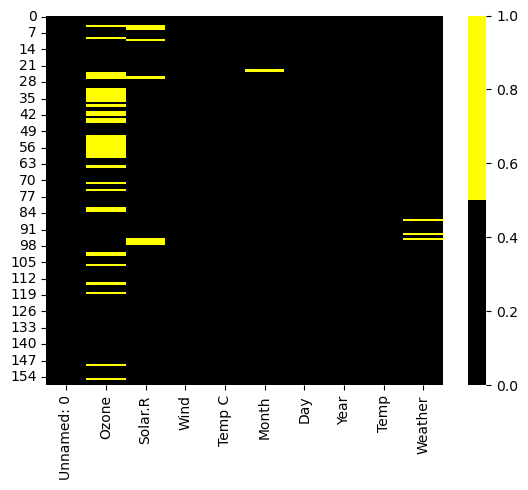

In [15]:
cols = data1.columns
colours = ['black', 'yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

In [16]:
median_Ozone = data1["Ozone"].median()
mean_Ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_Ozone)
print("Mean of Ozone: ", mean_Ozone)

Median of Ozone:  30.5
Mean of Ozone:  41.583333333333336


In [17]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

NameError: name 'median_ozone' is not defined

In [ ]:
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

In [ ]:
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

In [ ]:
print(data1["Month"].value_counts())
mode_Month = data1["Month"].mode()[0]
print(mode_Month)

In [19]:
data1.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,75,9.0,28,2010,75,S
157,158,18.0,131.0,8.0,76,9.0,29,2010,76,C


In [23]:
data1.reset_index(drop=True)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,75,9.0,28,2010,75,S


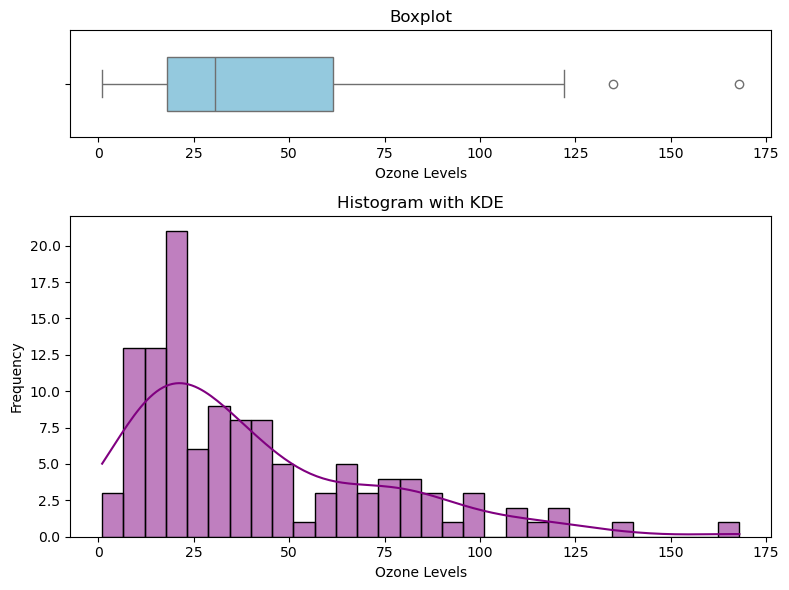

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1,3]})
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Violin Plot')

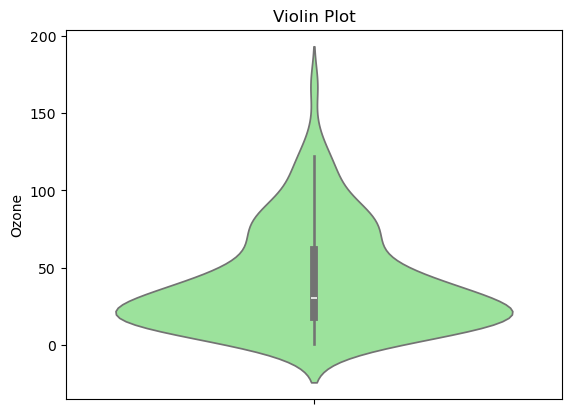

In [27]:
# create a figure for violin plot
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")


[array([], dtype=float64)]

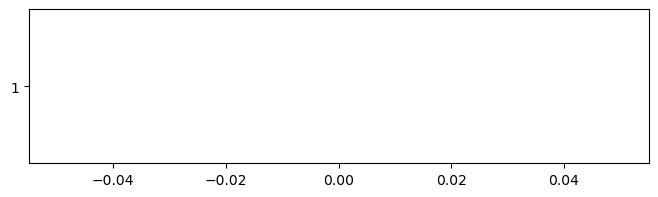

In [28]:
plt.figure(figsize=(8,2))
boxplot_data = plt.boxplot(data1['Ozone'], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

In [29]:
#method 2 for outlier detection
data1["Ozone"].describe()


count    120.000000
mean      41.583333
std       32.620709
min        1.000000
25%       18.000000
50%       30.500000
75%       61.500000
max      168.000000
Name: Ozone, dtype: float64

In [31]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

168.0


C:\Users\jangi\AppData\Local\Temp\ipykernel_22024\3121128980.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\jangi\AppData\Local\Temp\ipykernel_22024\3121128980.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


Text(0.5, 0, 'theoretical Qunatiles')

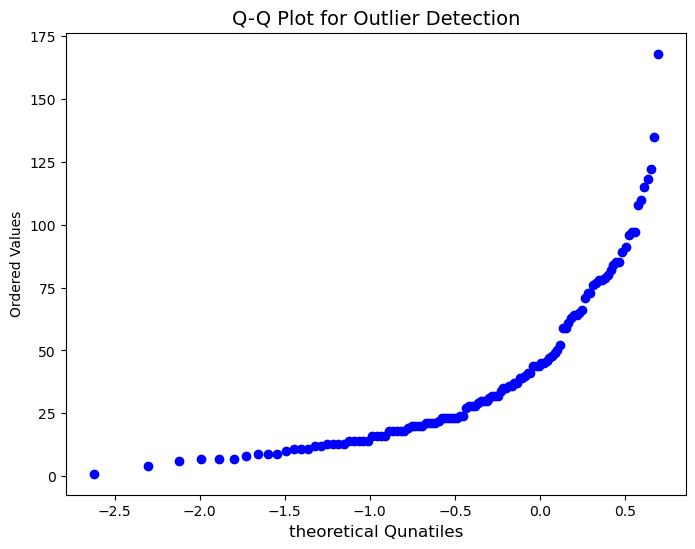

In [32]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("theoretical Qunatiles", fontsize=12)

observation from Q-Q plt
1) the data does not follow normal distribution as the data points are evitating significantly away from the red line
2) the data shows a right-skewed distribution and possible outliers 



C:\Users\jangi\AppData\Local\Temp\ipykernel_22024\1222012946.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

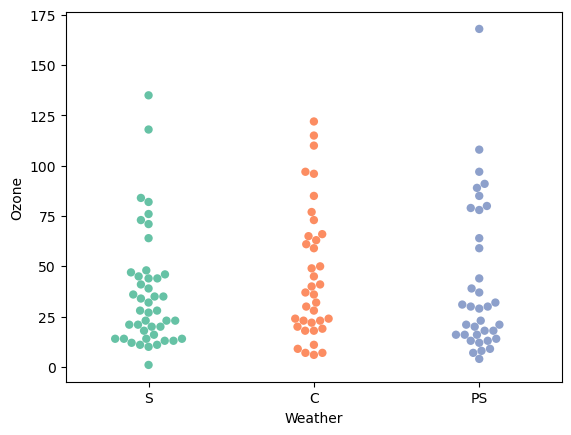

In [37]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)

<Axes: xlabel='Ozone', ylabel='Density'>

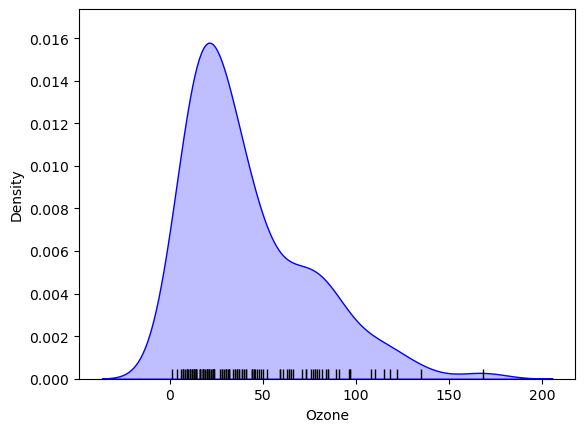

In [39]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

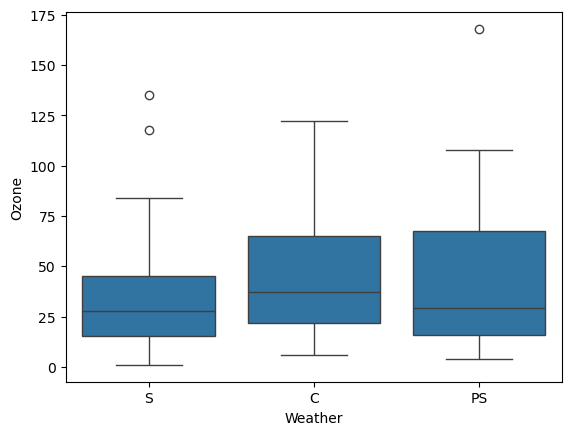

In [40]:
sns.boxplot(data = data1, x = "Weather", y="Ozone")

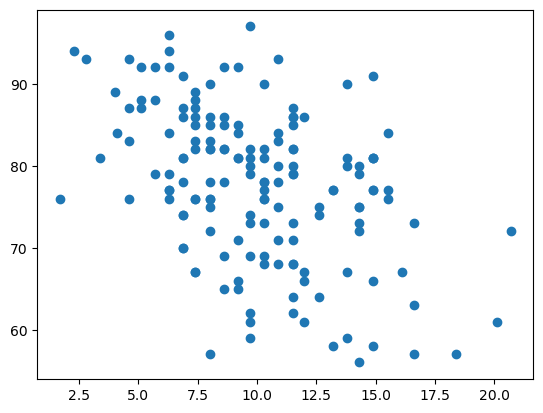

In [42]:
plt.scatter(data1["Wind"],data1["Temp"])

In [43]:
data1["Wind"].corr(data1["Temp"])

-0.4412467176312391

In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       157 non-null    float64
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 12.5+ KB


In [60]:
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Unnamed: 0,Ozone,Solar.R,Day
0,1,41.0,190.0,1
1,2,36.0,118.0,2
2,3,12.0,149.0,3
3,4,18.0,313.0,4
4,5,NaN,NaN,5
...,...,...,...,...
153,154,41.0,190.0,1
154,155,30.0,193.0,26
155,156,NaN,145.0,27
156,157,14.0,191.0,28


In [64]:
data1_numeric.corr()

,Unnamed: 0,Ozone,Solar.R,Day
Unnamed: 0,1.000000,0.124515,-0.109520,0.216219
Ozone,0.124515,1.000000,0.348642,-0.035055
Solar.R,-0.109520,0.348642,1.000000,-0.154212
Day,0.216219,-0.035055,-0.154212,1.000000


observation
1. the highest correlation strength its observed between ozone and temparture(0.97087)
2. the next higher correlation strength is observed between ozone and wind(-0.523738)
3. the next higher correlation strength is observed between wind and twmp(-0.441228)
4. the least correlation stength is observed between solar and wind (-0.055874)

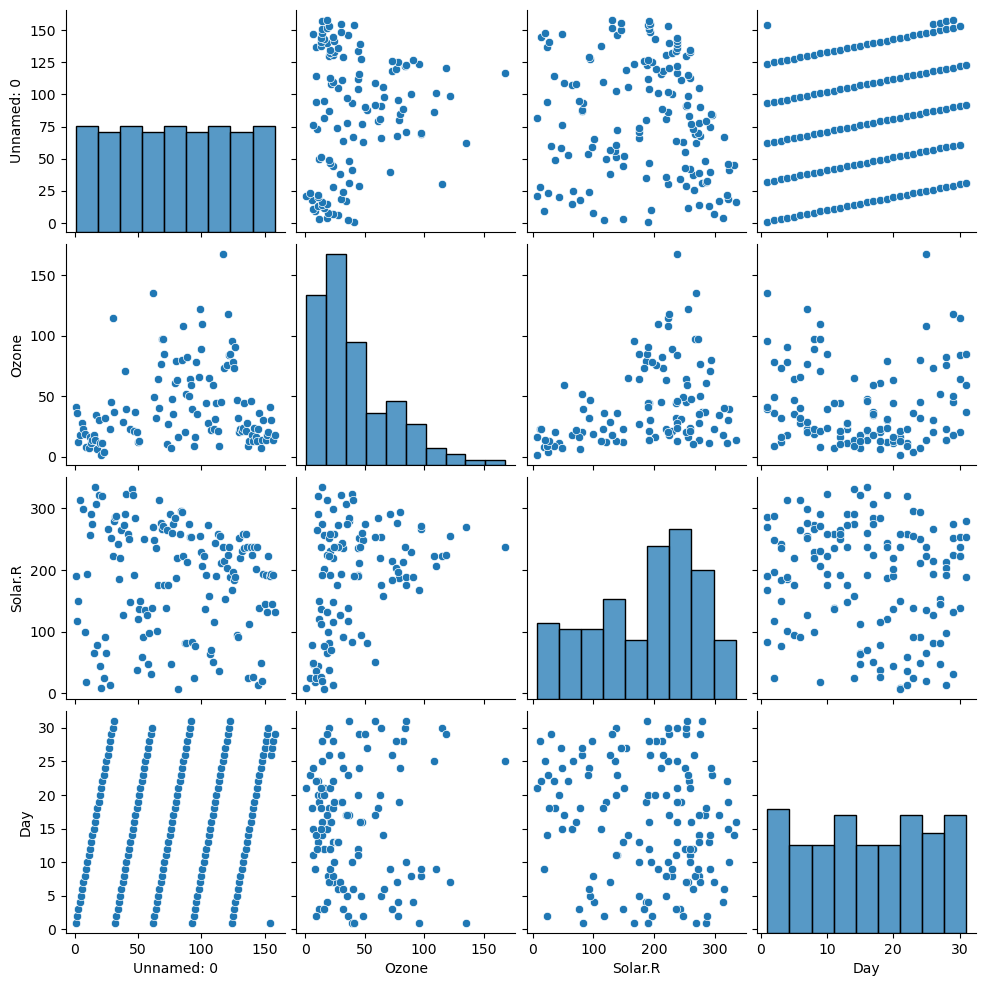

In [69]:
sns.pairplot(data1_numeric)

In [71]:
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,1,41.0,190.0,7.4,67,1,2010,67,True,False,False,False,False,False,False,True
1,2,36.0,118.0,8.0,72,2,2010,72,True,False,False,False,False,True,False,False
2,3,12.0,149.0,12.6,74,3,2010,74,True,False,False,False,False,False,True,False
3,4,18.0,313.0,11.5,62,4,2010,62,True,False,False,False,False,False,False,True
4,5,NaN,NaN,14.3,56,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,1,2010,67,True,False,False,False,False,True,False,False
154,155,30.0,193.0,6.9,70,26,2010,70,False,False,False,False,True,False,True,False
155,156,NaN,145.0,13.2,77,27,2010,77,False,False,False,False,True,False,False,True
156,157,14.0,191.0,14.3,75,28,2010,75,False,False,False,False,True,False,False,True


normalizatoin of data

In [76]:
data1_numeric

,Unnamed: 0,Ozone,Solar.R,Day
0,1,41.0,190.0,1
1,2,36.0,118.0,2
2,3,12.0,149.0,3
3,4,18.0,313.0,4
4,5,NaN,NaN,5
...,...,...,...,...
153,154,41.0,190.0,1
154,155,30.0,193.0,26
155,156,NaN,145.0,27
156,157,14.0,191.0,28


In [79]:
data1_numeric.values

array([[  1.,  41., 190.,   1.],
       [  2.,  36., 118.,   2.],
       [  3.,  12., 149.,   3.],
       [  4.,  18., 313.,   4.],
       [  5.,  nan,  nan,   5.],
       [  6.,  28.,  nan,   6.],
       [  7.,  23., 299.,   7.],
       [  8.,  19.,  99.,   8.],
       [  9.,   8.,  19.,   9.],
       [ 10.,  nan, 194.,  10.],
       [ 11.,   7.,  nan,  11.],
       [ 12.,  16., 256.,  12.],
       [ 13.,  11., 290.,  13.],
       [ 14.,  14., 274.,  14.],
       [ 15.,  18.,  65.,  15.],
       [ 16.,  14., 334.,  16.],
       [ 17.,  34., 307.,  17.],
       [ 18.,   6.,  78.,  18.],
       [ 19.,  30., 322.,  19.],
       [ 20.,  11.,  44.,  20.],
       [ 21.,   1.,   8.,  21.],
       [ 22.,  11., 320.,  22.],
       [ 23.,   4.,  25.,  23.],
       [ 24.,  32.,  92.,  24.],
       [ 25.,  nan,  66.,  25.],
       [ 26.,  nan, 266.,  26.],
       [ 27.,  nan,  nan,  27.],
       [ 28.,  23.,  13.,  28.],
       [ 29.,  45., 252.,  29.],
       [ 30., 115., 223.,  30.],
       [ 3

In [ ]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data1_numeric.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaled